# <h2> 3.6 Featurizing text data with tfidf and tfidf weighted word-vectors </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
#import spacy

In [2]:
#50K POINTS TO AVOID MEMORY ERROR
quora_data_df = pd.read_csv('train.csv')
quora_data_sort=quora_data_df.sort_values(by=['id'])
quora_data = quora_data_sort.head(50000)

# Data Pre Processing

In [3]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [4]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

# Pre Process Question 1

In [5]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_question1 = []
# tqdm is for printing the status bar
for sentance in tqdm(quora_data['question1'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_question1.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 14932.74it/s]


# Pre Process Question 2

In [6]:
from tqdm import tqdm
preprocessed_question2 = []
# tqdm is for printing the status bar
for sentance in tqdm(quora_data['question2'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_question2.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 13699.78it/s]


In [7]:
quora_data['clean_question1']=preprocessed_question1
quora_data['clean_question2']=preprocessed_question2

In [8]:
quora_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_question1,clean_question2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what step step guide invest share market india,what step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what story kohinoor koh noor diamond,what would happen indian government stole kohi...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how i increase speed internet connection using...,how internet speed increased hacking dns
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why i mentally lonely how i solve,find remainder math 23 24 math divided 24 23
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water


In [9]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [10]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = quora_data.drop(['qid1','qid2','question1','question2'],axis=1)

In [10]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [13]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [11]:
df3.head()

,id,is_duplicate,clean_question1,clean_question2
0,0,0,what step step guide invest share market india,what step step guide invest share market
1,1,0,what story kohinoor koh noor diamond,what would happen indian government stole kohi...
2,2,0,how i increase speed internet connection using...,how internet speed increased hacking dns
3,3,0,why i mentally lonely how i solve,find remainder math 23 24 math divided 24 23
4,4,0,which one dissolve water quikly sugar salt met...,which fish would survive salt water


In [12]:
df1=df1[0:50000]
df2=df2[0:50000]

In [13]:
print(df1.shape)
print(df2.shape)
print(df3.head())

(50000, 17)
(50000, 12)
   id  is_duplicate                                    clean_question1  \
0   0             0     what step step guide invest share market india   
1   1             0               what story kohinoor koh noor diamond   
2   2             0  how i increase speed internet connection using...   
3   3             0                  why i mentally lonely how i solve   
4   4             0  which one dissolve water quikly sugar salt met...   

                                     clean_question2  
0           what step step guide invest share market  
1  what would happen indian government stole kohi...  
2           how internet speed increased hacking dns  
3       find remainder math 23 24 math divided 24 23  
4                which fish would survive salt water  


In [14]:
df1['id'] = [i for i in range(50000)]
df2['id'] = [i for i in range(50000)]
df3['id'] = [i for i in range(50000)]

In [14]:
# storing the final features to csv file
if not os.path.isfile('final_features_tfidf.csv'):
    df3  = df3.merge(df2,on='id',how='left')
    df3  = df3.merge(df1,on='id',how='left')
    df3.to_csv('final_features_tfidf.csv')

In [15]:
Y = df3['is_duplicate']
X = df3.drop('is_duplicate', axis=1)

# Train And Test Split of Data

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# TFIDFW2V-Vectorizing For Question1 and Question2

In [17]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [18]:
tfidf_model = TfidfVectorizer()
questions = list(X_train['clean_question1']) + list(X_train['clean_question2'])
tfidf_model.fit(questions)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [19]:
essay_tfidf_w2v_vectors_train_question1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_question1'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_train_question1.append(vector)
print(len(essay_tfidf_w2v_vectors_train_question1))
print(len(essay_tfidf_w2v_vectors_train_question1[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:02<00:00, 11850.89it/s]


35000
300


In [20]:
essay_tfidf_w2v_vectors_train_question2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_question2'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_train_question2.append(vector)
print(len(essay_tfidf_w2v_vectors_train_question2))
print(len(essay_tfidf_w2v_vectors_train_question2[0]))

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:03<00:00, 9969.35it/s]


35000
300


In [21]:
essay_tfidf_w2v_vectors_test_question1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_question1'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_test_question1.append(vector)
print(len(essay_tfidf_w2v_vectors_test_question1))
print(len(essay_tfidf_w2v_vectors_test_question1[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:01<00:00, 11783.85it/s]


15000
300


In [22]:
essay_tfidf_w2v_vectors_test_question2 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_question2'].values.astype('U')): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_test_question2.append(vector)
print(len(essay_tfidf_w2v_vectors_test_question2))
print(len(essay_tfidf_w2v_vectors_test_question2[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:01<00:00, 10689.07it/s]


15000
300


In [23]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
from scipy.sparse import coo_matrix
import scipy
X_trainw2v_q1 = coo_matrix(essay_tfidf_w2v_vectors_train_question1)
X_trainw2v_q2 = coo_matrix(essay_tfidf_w2v_vectors_train_question2)

In [24]:
X_trainw2v_q1_q2 = scipy.sparse.hstack((X_trainw2v_q1, X_trainw2v_q2))

In [25]:
print(X_trainw2v_q1_q2.shape)

(35000, 600)


In [26]:
X_testw2v_q1 = coo_matrix(essay_tfidf_w2v_vectors_test_question1)
X_testw2v_q2 = coo_matrix(essay_tfidf_w2v_vectors_test_question2)

X_testw2v_q1_q2 = scipy.sparse.hstack((X_testw2v_q1, X_testw2v_q2))
print(X_testw2v_q1_q2.shape)

(15000, 600)


In [27]:
X_train_no_tfidfw2v = X_train.drop(['clean_question1', 'clean_question2','id'], axis=1)
X_test_no_tfidfw2v = X_test.drop(['clean_question1', 'clean_question2','id'], axis=1)

X_train_no_tfidfw2v = np.array(X_train_no_tfidfw2v)
X_test_no_tfidfw2v = np.array(X_test_no_tfidfw2v)

In [28]:
X_trainw2v_final = scipy.sparse.hstack((X_train_no_tfidfw2v, X_trainw2v_q1_q2))
X_testw2v_final = scipy.sparse.hstack((X_test_no_tfidfw2v, X_testw2v_q1_q2))

In [29]:
print(X_trainw2v_final.shape)
print(X_testw2v_final.shape)

(35000, 600)
(15000, 600)


# TFIDF-Vectorizing For Question1 and Question2

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(X_train['clean_question1']) + list(X_train['clean_question2'])

tfidf = TfidfVectorizer(min_df=5)
tfidf.fit(questions)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [45]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
from scipy.sparse import coo_matrix
import scipy
X_train_q1 = coo_matrix(tfidf.transform(X_train['clean_question1']))
X_train_q2 = coo_matrix(tfidf.transform(X_train['clean_question2']))

In [46]:
X_train_q1_q2 = scipy.sparse.hstack((X_train_q1, X_train_q2))

In [38]:
print(X_train_q1.shape)
print(X_train_q2.shape)


(35000, 8498)
(35000, 8498)


In [47]:
X_test_q1 = coo_matrix(tfidf.transform(X_test['clean_question1']))
X_test_q2 = coo_matrix(tfidf.transform(X_test['clean_question2']))

X_test_q1_q2 = scipy.sparse.hstack((X_test_q1, X_test_q2))

In [40]:
X_test_q1_q2.shape

(15000, 16996)

In [48]:
X_train_no_tfidf = X_train.drop(['clean_question1', 'clean_question2','id'], axis=1)
X_test_no_tfidf = X_test.drop(['clean_question1', 'clean_question2','id'], axis=1)

X_train_no_tfidf = np.array(X_train_no_tfidf)
X_test_no_tfidf = np.array(X_test_no_tfidf)

In [49]:
X_train_final = scipy.sparse.hstack((X_train_no_tfidf, X_train_q1_q2))
X_test_final = scipy.sparse.hstack((X_test_no_tfidf, X_test_q1_q2))

In [50]:
scipy.sparse.save_npz("X_train_final.npz", X_train_final)
scipy.sparse.save_npz("X_test_final.npz", X_test_final)

In [51]:
print(X_train_final.shape)
print(X_test_final.shape)

(35000, 17017)
(15000, 17017)


# Assignments 

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.

In [34]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Logistic regression with simple TF-IDF vectors

In [59]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_final, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_final, y_train)
    predict_y = sig_clf.predict_proba(X_test_final)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha =  1e-05 The log loss is: 0.15850450969904847
For values of alpha =  0.0001 The log loss is: 0.13722327834589232
For values of alpha =  0.001 The log loss is: 0.16428991359924539
For values of alpha =  0.01 The log loss is: 0.12216228164177602
For values of alpha =  0.1 The log loss is: 0.23376921681636728
For values of alpha =  1 The log loss is: 0.46539269542250017
For values of alpha =  10 The log loss is: 0.5484631980503825


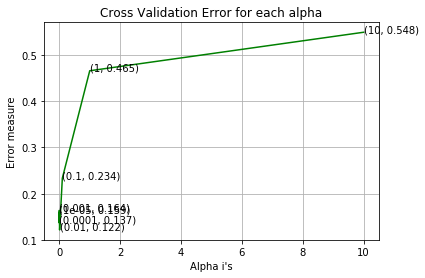

In [60]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  0.01 The train log loss is: 0.11819696826981801
For values of best alpha =  0.01 The test log loss is: 0.12216228164177602
Total number of data points : 15000


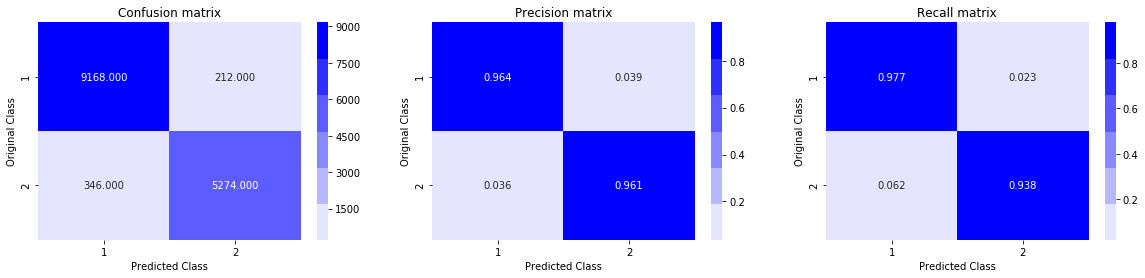

In [62]:
import seaborn as sns
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_final, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_final, y_train)

predict_y = sig_clf.predict_proba(X_train_final)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Linear SVM with hyperparameter tuning

In [33]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train_final, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_final, y_train)
    predict_y = sig_clf.predict_proba(X_test_final)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

NameError: name 'X_train_final' is not defined

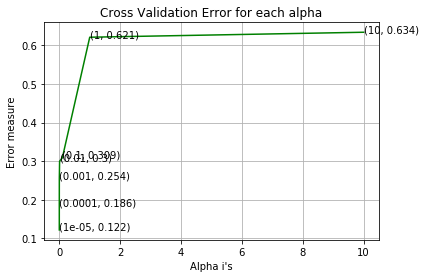

In [64]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  1e-05 The train log loss is: 0.11176714967908127
For values of best alpha =  1e-05 The test log loss is: 0.12175817988776087
Total number of data points : 15000


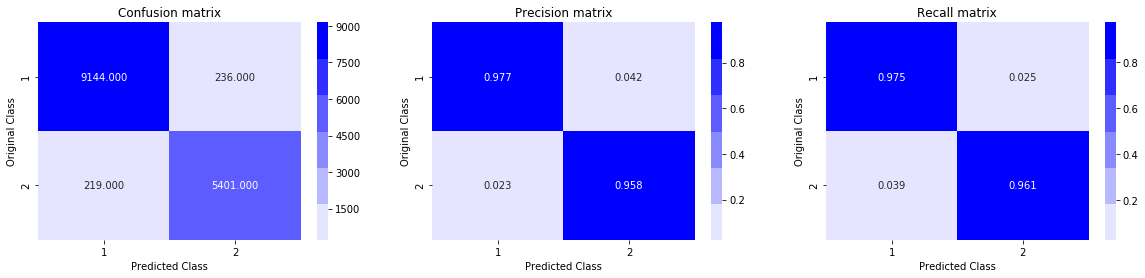

In [65]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_final, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_final, y_train)

predict_y = sig_clf.predict_proba(X_train_final)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# XGBOOST For TFIDF Data Matrix

In [66]:
#https://github.com/RavigML/Quora-Question-Pairs/blob/master/4.ML_models.ipynb?short_path=0655f13
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import uniform , randint
import time
from time import time
from scipy.stats import randint as sp_randint
n_estimators = [20,40,60,80,100]
max_depth = [1,5,10,50,100]
train_logloss = []
test_logloss = []
for i in n_estimators:
    for j in max_depth:
        XGBC = XGBClassifier(n_estimators=i, max_depth=j, learning_rate=0.1 )
        XGBC.fit(X_train_final, y_train)
        predict_y = XGBC.predict_proba(X_train_final)
        train_logloss.append(log_loss(y_train, predict_y))
        predict_y = XGBC.predict_proba(X_test_final)
        test_logloss.append(log_loss(y_test, predict_y))
        print('For n_estimators = ', i, "For max_depth = ", j , "The log loss is : ",log_loss(y_test, predict_y))

For n_estimators =  20 For max_depth =  1 The log loss is :  0.06781983747084935
For n_estimators =  20 For max_depth =  5 The log loss is :  0.06781983747084935
For n_estimators =  20 For max_depth =  10 The log loss is :  0.06781983747084935
For n_estimators =  20 For max_depth =  50 The log loss is :  0.06781983747084935
For n_estimators =  20 For max_depth =  100 The log loss is :  0.06781983747084935
For n_estimators =  40 For max_depth =  1 The log loss is :  0.008935277876754601
For n_estimators =  40 For max_depth =  5 The log loss is :  0.008935277876754601
For n_estimators =  40 For max_depth =  10 The log loss is :  0.008935277876754601
For n_estimators =  40 For max_depth =  50 The log loss is :  0.008935277876754601
For n_estimators =  40 For max_depth =  100 The log loss is :  0.008935277876754601
For n_estimators =  60 For max_depth =  1 The log loss is :  0.001250226712009559
For n_estimators =  60 For max_depth =  5 The log loss is :  0.001250226712009559
For n_estimat

For n_estimators =  60 For max_depth =  100 The log loss is :  0.011927434945160834


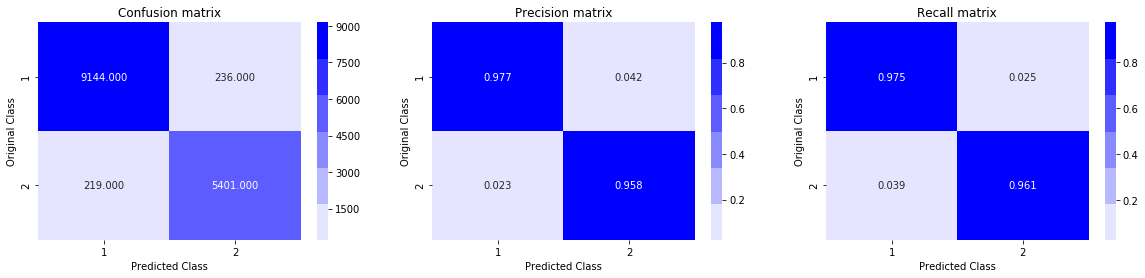

In [67]:
i = 60 # n_estimators
j = 100 # max_depth
XGBC = XGBClassifier(n_estimators=i, max_depth=j, learning_rate=0.1 , subsample=0.5 , colsample_bytree=0.6)
XGBC.fit(X_train_final, y_train)
predict_y = XGBC.predict_proba(X_test_final)
print('For n_estimators = ', i, "For max_depth = ", j , "The log loss is : ",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, predicted_y)

# XGBOOST For TFIDF-W2V Data Matrix

In [31]:
#https://github.com/RavigML/Quora-Question-Pairs/blob/master/4.ML_models.ipynb?short_path=0655f13
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import uniform , randint
import time
from time import time
from scipy.stats import randint as sp_randint
n_estimators = [20,40,60,80,100]
max_depth = [1,5,10,50,100]
train_logloss = []
test_logloss = []
for i in n_estimators:
    for j in max_depth:
        XGBC = XGBClassifier(n_estimators=i, max_depth=j, learning_rate=0.1 )
        XGBC.fit(X_trainw2v_final, y_train)
        predict_y = XGBC.predict_proba(X_trainw2v_final)
        train_logloss.append(log_loss(y_train, predict_y))
        predict_y = XGBC.predict_proba(X_testw2v_final)
        test_logloss.append(log_loss(y_test, predict_y))
        print('For n_estimators = ', i, "For max_depth = ", j , "The log loss is : ",log_loss(y_test, predict_y))

For n_estimators =  20 For max_depth =  1 The log loss is :  0.6501765575428804
For n_estimators =  20 For max_depth =  5 The log loss is :  0.5972188795348008
For n_estimators =  20 For max_depth =  10 The log loss is :  0.5579011199350158
For n_estimators =  20 For max_depth =  50 The log loss is :  0.5462199993436535
For n_estimators =  20 For max_depth =  100 The log loss is :  0.5456512831325332
For n_estimators =  40 For max_depth =  1 The log loss is :  0.6439894962827365
For n_estimators =  40 For max_depth =  5 The log loss is :  0.566374098256727
For n_estimators =  40 For max_depth =  10 The log loss is :  0.5223133284029862
For n_estimators =  40 For max_depth =  50 The log loss is :  0.5230949145857244
For n_estimators =  40 For max_depth =  100 The log loss is :  0.5226836221919084
For n_estimators =  60 For max_depth =  1 The log loss is :  0.6397257734119892
For n_estimators =  60 For max_depth =  5 The log loss is :  0.5499332093785827
For n_estimators =  60 For max_de

In [ ]:
For n_estimators =  20 For max_depth =  1 The log loss is :  0.6501765575428804
For n_estimators =  20 For max_depth =  5 The log loss is :  0.5972188795348008
For n_estimators =  20 For max_depth =  10 The log loss is :  0.5579011199350158
For n_estimators =  20 For max_depth =  50 The log loss is :  0.5462199993436535
For n_estimators =  20 For max_depth =  100 The log loss is :  0.5456512831325332
For n_estimators =  40 For max_depth =  1 The log loss is :  0.6439894962827365
For n_estimators =  40 For max_depth =  5 The log loss is :  0.566374098256727
For n_estimators =  40 For max_depth =  10 The log loss is :  0.5223133284029862
For n_estimators =  40 For max_depth =  50 The log loss is :  0.5230949145857244
For n_estimators =  40 For max_depth =  100 The log loss is :  0.5226836221919084
For n_estimators =  60 For max_depth =  1 The log loss is :  0.6397257734119892
For n_estimators =  60 For max_depth =  5 The log loss is :  0.5499332093785827
For n_estimators =  60 For max_depth =  10 The log loss is :  0.5072147754848624
For n_estimators =  60 For max_depth =  50 The log loss is :  0.5176010946106941
For n_estimators =  60 For max_depth =  100 The log loss is :  0.5202597905951242
For n_estimators =  80 For max_depth =  1 The log loss is :  0.6364181378225485
For n_estimators =  80 For max_depth =  5 The log loss is :  0.5390252445430185
For n_estimators =  80 For max_depth =  10 The log loss is :  0.49670179429411265
For n_estimators =  80 For max_depth =  50 The log loss is :  0.5172801497348429
For n_estimators =  80 For max_depth =  100 The log loss is :  0.5191873216188668
For n_estimators =  100 For max_depth =  1 The log loss is :  0.6336596700867018
For n_estimators =  100 For max_depth =  5 The log loss is :  0.5310487133493415
For n_estimators =  100 For max_depth =  10 The log loss is :  0.4924305703166756
For n_estimators =  100 For max_depth =  50 The log loss is :  0.5190712851314417

In [35]:
i = 100 # n_estimators
j = 10 # max_depth
XGBC = XGBClassifier(n_estimators=i, max_depth=j, learning_rate=0.1 , subsample=0.5 , colsample_bytree=0.6)
XGBC.fit(X_trainw2v_final, y_train)
predict_y = XGBC.predict_proba(X_testw2v_final)
print('For n_estimators = ', i, "For max_depth = ", j , "The log loss is : ",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, predicted_y)

For n_estimators =  100 For max_depth =  10 The log loss is :  0.5183392731091628


NameError: name 'predicted_y' is not defined

# Conclusion

In [1]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
TB = PrettyTable()
TB.field_names = ["Vectorizer", "Model", "Hyperparameter", "Test_log_loss"]
TB.title = "Quora Question Similarity"
TB.add_row(["TFIDF", "Logistic Regression", "Alpha:0.01",12216228164177602])
TB.add_row(["TFIDF", "Linear SVM", "Alpha:1e-05", 0.12175817988776087])
TB.add_row(["TFIDF", "XGBoost","n_estimators:60,max_depth:100", 0.011927434945160834])
TB.add_row(["TFIDF-W2V", "XGBoost","n_estimators:100,max_depth:10", 0.4924305703166756])
print(TB)

+------------+---------------------+-------------------------------+----------------------+
| Vectorizer |        Model        |         Hyperparameter        |    Test_log_loss     |
+------------+---------------------+-------------------------------+----------------------+
|   TFIDF    | Logistic Regression |           Alpha:0.01          |  12216228164177602   |
|   TFIDF    |      Linear SVM     |          Alpha:1e-05          | 0.12175817988776087  |
|   TFIDF    |       XGBoost       | n_estimators:60,max_depth:100 | 0.011927434945160834 |
+------------+---------------------+-------------------------------+----------------------+


In [ ]:
TASK 1 : 
    
Using logistic regression :-
    
         best alpha =  0.01. The train log loss is: 0.11819696826981801
         best alpha =  0.01. The test log loss is: 0.12216228164177602
            
Using Linear SVM:-

         best alpha =  1e-05 The train log loss is: 0.11176714967908127
         best alpha =  1e-05 The test log loss is: 0.12175817988776087
    
TASK 2 : 

Using XGBOOST-TFIDF:-

  For n_estimators =  60 For max_depth =  100 The log loss is :  0.011927434945160834 
    
Using XGBOOST-TFIDFW2V:-
    
  For n_estimators =  100 For max_depth =  10 The log loss is :  0.4924305703166756